<h1 align="center">Global Interpretability</h1>

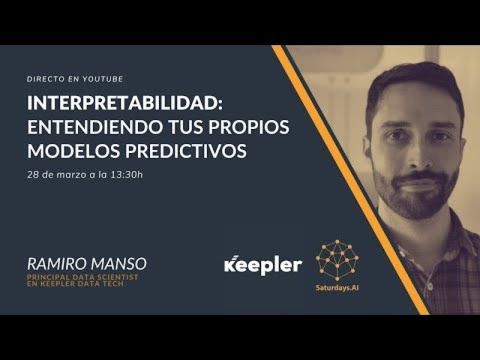

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('SmetLTddYCw', width=600, height=300)

<h1 align="center">Crear modelo</h1>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix

import scikitplot as skplt

from xgboost import XGBClassifier
from xgboost import plot_importance

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


### Load data

In [3]:
df = pd.read_csv('data/titanic_train.csv', index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean, feature engineering...

In [4]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df["Embarked"].fillna("S", inplace=True)
df_embarked = pd.get_dummies(df["Embarked"], prefix="Embarked", drop_first=True)
df = pd.concat([df, df_embarked], axis=1).drop(["Embarked"], axis=1)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

### Split

In [5]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

### Train

In [6]:
xgb = XGBClassifier(max_depth=5, n_estimators = 100, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Evaluate

Model accuracy is:  0.8212290502793296


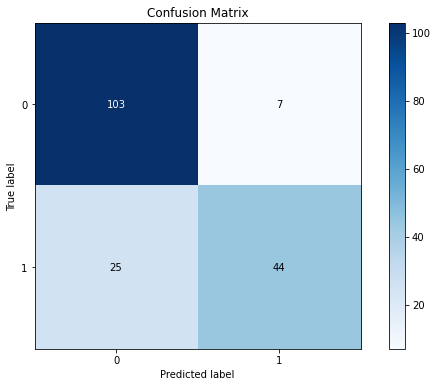

In [7]:
accuracy = accuracy_score(y_valid, xgb.predict(X_valid))
print("Model accuracy is:  {}".format(accuracy))

skplt.metrics.plot_confusion_matrix(y_valid, xgb.predict(X_valid))
plt.show()

<h1 align="center">Feature Importance</h1>

### XGBoost netive

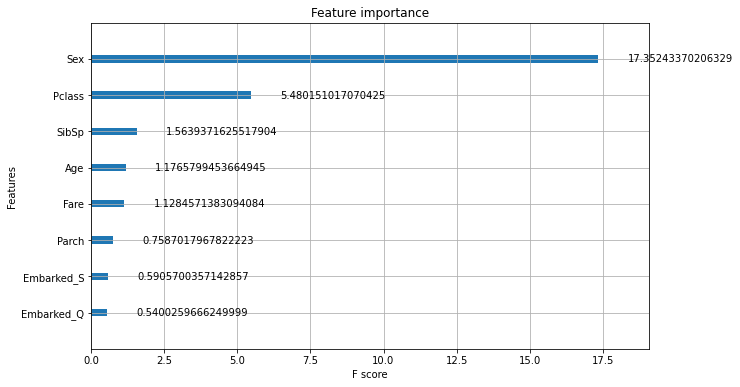

In [8]:
plot_importance(xgb, importance_type="gain")
plt.show()

<h1 align="center">SHAP</h1>

In [15]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

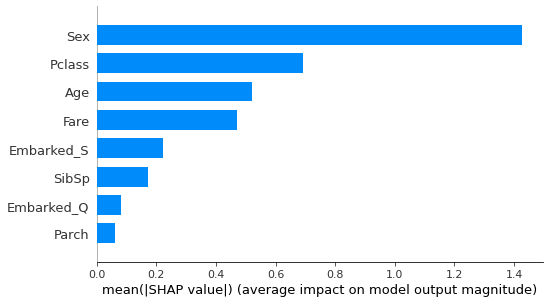

In [16]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

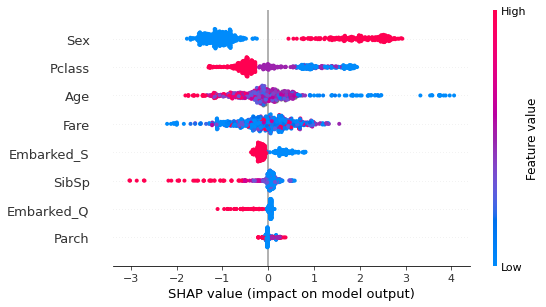

In [14]:
shap.summary_plot(shap_values, X_train, show = False)

In [ ]:
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], features=X_train.columns)

<h1 align="center">LIME</h1>

In [4]:
import lime
import lime.lime_tabular

In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names = feature_names,
                                                   class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names,
                                                   kernel_width=3)

NameError: name 'lime' is not defined

<h1 align="center">ELI5</h1>

In [3]:
import eli5

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
